###### Import Libraries

In [370]:
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [371]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###### Rescale Image for Training Data

In [372]:
training_data_generator = ImageDataGenerator(rescale = 1.0/255)

In [373]:
training_iterator= training_data_generator.flow_from_directory("Downloads/CA_Part2_Dataset/train", batch_size = 32, class_mode="categorical", color_mode="rgb", target_size=(150,150))

Found 240 images belonging to 4 classes.


###### Rescale Image for Test Data

In [374]:
testing_data_generator = ImageDataGenerator(rescale = 1.0/255)

In [375]:
testing_iterator= testing_data_generator.flow_from_directory("Downloads/CA_Part2_Dataset/test", batch_size = 64, class_mode="categorical", color_mode="rgb", target_size=(150,50))

Found 60 images belonging to 4 classes.


In [376]:
validation_data_generator = ImageDataGenerator(rescale = 1/255)

In [377]:
validation_generator = validation_data_generator.flow_from_directory("Downloads/CA_Part2_Dataset/test", batch_size = 64, class_mode="categorical", color_mode="rgb", target_size=(150,150))

Found 60 images belonging to 4 classes.


###### CNN model

In [378]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5,5), activation='relu',input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

history = model.fit(training_iterator,
                    epochs = 15,
                    verbose = 1,
                   validation_data = validation_generator)

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_197 (Conv2D)          (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_169 (MaxPoolin (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 69, 69, 32)        12832     
_________________________________________________________________
max_pooling2d_170 (MaxPoolin (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_171 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_200 (Conv2D)          (None, 14, 14, 128)     

###### Plot Accuracy and Loss over 15 Epochs

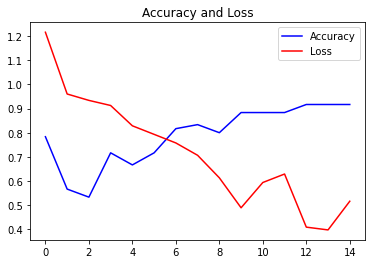

<Figure size 432x288 with 0 Axes>

In [381]:
acc = history.history['acc']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, val_acc, 'b', label='Accuracy')
plt.plot(epochs, val_loss, 'r', label='Loss')
plt.title('Accuracy and Loss')
plt.legend()
plt.figure()

plt.show()